Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.


In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## LOAD DATASET

In [6]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos["PRICE"] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## DATA PRE-PROCESSING

In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Information about data:

1. There are no null values.
2. All the 14 column values are in float64.
3. The statistics are shown for all column values.

## EDA

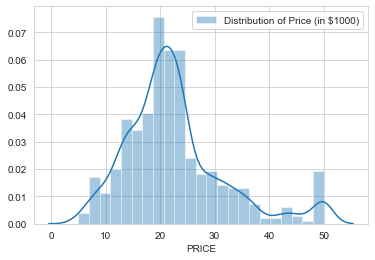

In [20]:
sns.set_style("whitegrid")
sns.distplot(bos["PRICE"], label = "Distribution of Price (in $1000)")
plt.legend()

As given in the data description the MEDV i.e PRICE column have median value of owner-occupied homes in $1000's

The plot shows an almost normal distribution of PRICE with few outliers in the right wing i.e positively skewed. 

The PRICE data seems to be centered around 18 to 24 (in $1000) 

In [46]:
for i in bos.columns:
    print("The number of unqiue values for {} column is {} \n". format (i, bos[i].value_counts().count()))

The number of unqiue values for CRIM column is 504 

The number of unqiue values for ZN column is 26 

The number of unqiue values for INDUS column is 76 

The number of unqiue values for CHAS column is 2 

The number of unqiue values for NOX column is 81 

The number of unqiue values for RM column is 446 

The number of unqiue values for AGE column is 356 

The number of unqiue values for DIS column is 412 

The number of unqiue values for RAD column is 9 

The number of unqiue values for TAX column is 66 

The number of unqiue values for PTRATIO column is 46 

The number of unqiue values for B column is 357 

The number of unqiue values for LSTAT column is 455 

The number of unqiue values for PRICE column is 229 



This above analysis and the data desciption shows that CHAS column i.e  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) is a categorical feature with 0 or 1 value.

The RAD column i.e index of accessibility to radial highways is a categorical column with 9 unique values.

All the other columns are numerical columns.

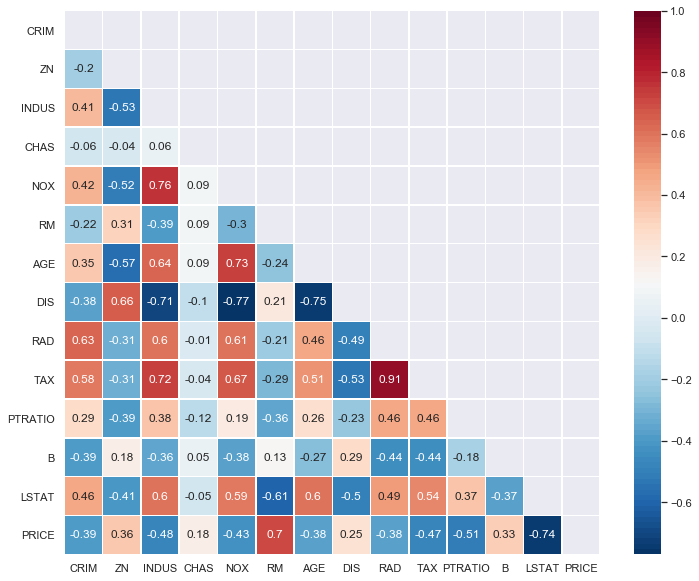

In [55]:
correlation_matrix = bos.corr().round(2)

sns.set(rc={'figure.figsize':(12,10)})

mask = np.zeros_like(correlation_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, annot = True, cmap=sns.color_palette("RdBu_r", 100), mask = mask, linewidth = 0.5)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

The correlation heatmap shows a sifnificant positive correlation between:

TAX and RAD : 0.91

INDUS and NOX : 0.76

AGE and NOX : 0.73

INDUS and TAX : 0.72

PRICE and RM : 0.7

The correlation heatmap shows a sifnificant negative correlation between:

DIS and NOX : -0.77

DIS and AGE : -0.75

PRICE and LSTAT : -0.74

DIS and INDUS : .-0.71

We will explore these relationships further.

Since we are using Linear Regression, it is important to handle multicollinearity between the independent variables.

Even if TAX and RAD shows high correlation between them, we cannot just remove any one and keep the other one because they both represent different characteristics of the data and removing any one of them can hamper the relationship with other variables.

Similarly, other variables pairs which seem correlated also cannot be treated this way because we need to capture all the information represented in the variables. Hence, we will keep all the variables for now.

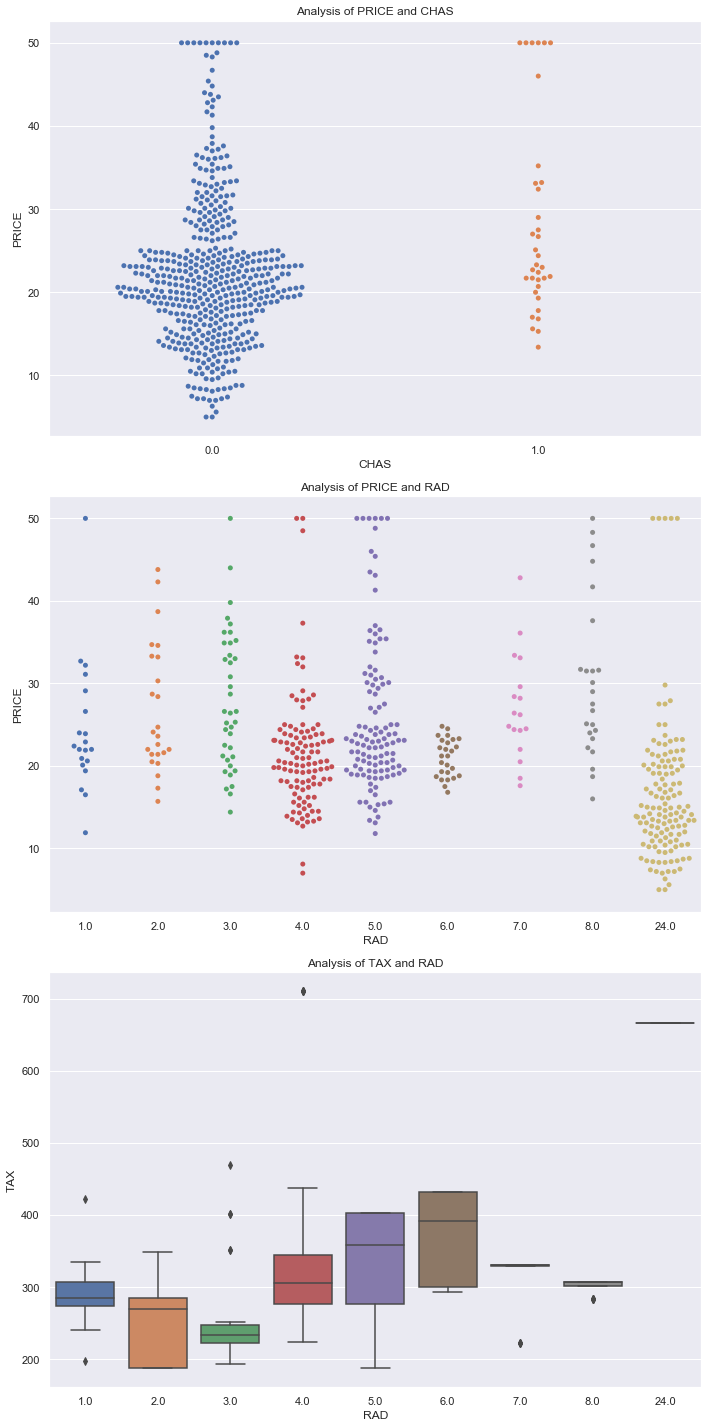

In [74]:
sns.set(rc={'figure.figsize':(10,20)})

plt.subplot(3,1,1)
sns.swarmplot(x = "CHAS", y = "PRICE", data = bos)
plt.title("Analysis of PRICE and CHAS")

plt.subplot(3,1,2)
sns.swarmplot(x = "RAD", y = "PRICE", data = bos)
plt.title("Analysis of PRICE and RAD")

plt.subplot(3,1,3)
sns.boxplot(x = "RAD", y = "TAX", data = bos)
plt.title("Analysis of TAX and RAD")


plt.tight_layout()

Text(0.5, 1, 'Analysis of PRICE and RM')

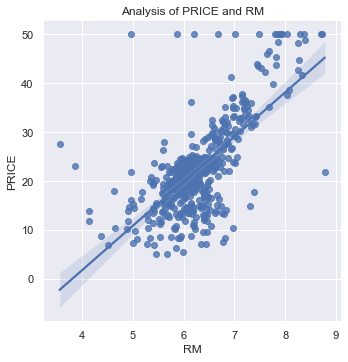

In [84]:

sns.lmplot(x = "RM", y = "PRICE", data = bos)
plt.title("Analysis of PRICE and RM")


PRICE AND RM show a positive linear relationship with few outliers. The highest PRICE is capped at 50.
The outliers may be explained due to other factors. For e.g, even if the number of rooms in a property are quite high, the price may be not that much due to industrial surrounding or lower status locality etc.

Text(0.5, 1, 'Analysis of LSTAT and PRICE')

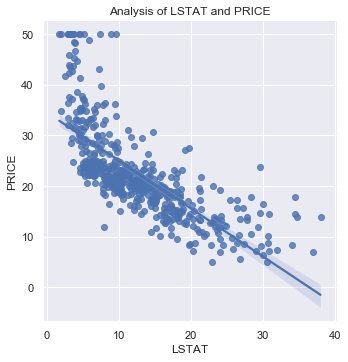

In [82]:
sns.lmplot(x = "LSTAT", y = "PRICE", data = bos)
plt.title("Analysis of LSTAT and PRICE")

As can be obvious, the PRICE in localities with low lower status population i.e LSTAT is much higher. The plot shows negative linear relationship with few outliers.

## DATA PREPERATION

In [87]:
y = bos["PRICE"]

X = bos.drop("PRICE", axis = 1)

In [88]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [89]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# R squared score

lr.score(x_train,y_train)

0.748087259862344

In [100]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [101]:
adj_r2(x_train,y_train)

0.7391150252820987

In [104]:
lr.score(x_test,y_test)

0.6844267283527146

In [105]:
adj_r2(x_test,y_test)

0.6481218386941773

In [ ]:
# Since our test score is less then training score, we can check for overfitting

In [106]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV


In [107]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 5 cross validations

lasscv = LassoCV(alphas = None,cv = 5, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [108]:
best_alpha = lasscv.alpha_

In [110]:
lasso_reg = Lasso(best_alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00035978708150203063, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
lasso_reg.score(x_test, y_test)

0.6844210045567491

In [ ]:
# Our Lasso R square score is similiar to Linear Regression without regularisation. 

In [112]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 5 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them.

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=5,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.30094947, 0.75625323, 4.41865764, 9.19762739, 6.98351007,
       0.22689276, 8.85537387, 0.22037841, 5.73587505, 6.04658488,
       5.87762253, 0.97864381, 9.9174154 , 9.84100498, 3.65675269,
       1.57459786, 9.59210194, 6.01086279, 5.17918451, 7.9568494 ,
       9.13200495, 0.85694502, 6.74929352, 5.86804425, 2.67254315,
       1.56007181, 8.88661415, 2.65217486, 2.40207826, 2.64711659,
       0.17407843, 8.90394048, 1.52902534, 9.25950443, 1.80050143,
       3.57497407, 8.91108782, 6.57962296, 9.45277033, 5.16111733,
       8.08272685, 0.40285322, 1.49177014, 4.92345073, 3.14030326,
       9.96483092, 2.94021005, 2.21205386, 4.10140513, 8.51645808]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [113]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.17407843011409962, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [114]:
ridge_model.score(x_test, y_test)

0.6843805807528683

In [ ]:
# Our Lasso R square score is also similiar to Linear Regression without regularisation and Lasso Regression suggesting
# no overfitting.

In [115]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [117]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [118]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.022844158819211827, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [119]:
elasticnet_reg.score(x_test, y_test)

0.6827687393783728

In [120]:
# Our Elastic Net R square score is also similiar to Linear Regression without regularisation and Lasso and Ridge
# Regression suggesting no overfitting.

We can visualize how our model is predicting by plotting a scatter plot between the original house price and predicted house prices for the test data.

In [122]:
y_pred = lr.predict(x_test)

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

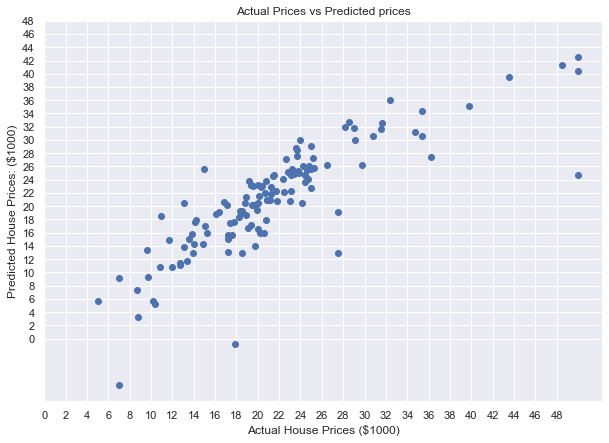

In [123]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")